In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

# 1. Preprocessing the data

In [54]:
df = pd.read_csv('data_credit_card.csv')

## a. Check a few observations and get familiar with the data.

In [91]:
df.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,0.00,95.4,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## b. Check the size and info of the data set

In [56]:
df.shape

(8950, 18)

There are 8950 rows and 18 columns in the given dataframe.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Of the 18 columns, only CUST_ID is of object data type. Rest are numerical.

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


The data has many outliers 

## c. Check for missing values. Impute the missing values if there is any

In [59]:
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [61]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.fillna(df.median(), inplace=True)

Imputed missing values with median

In [62]:
df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

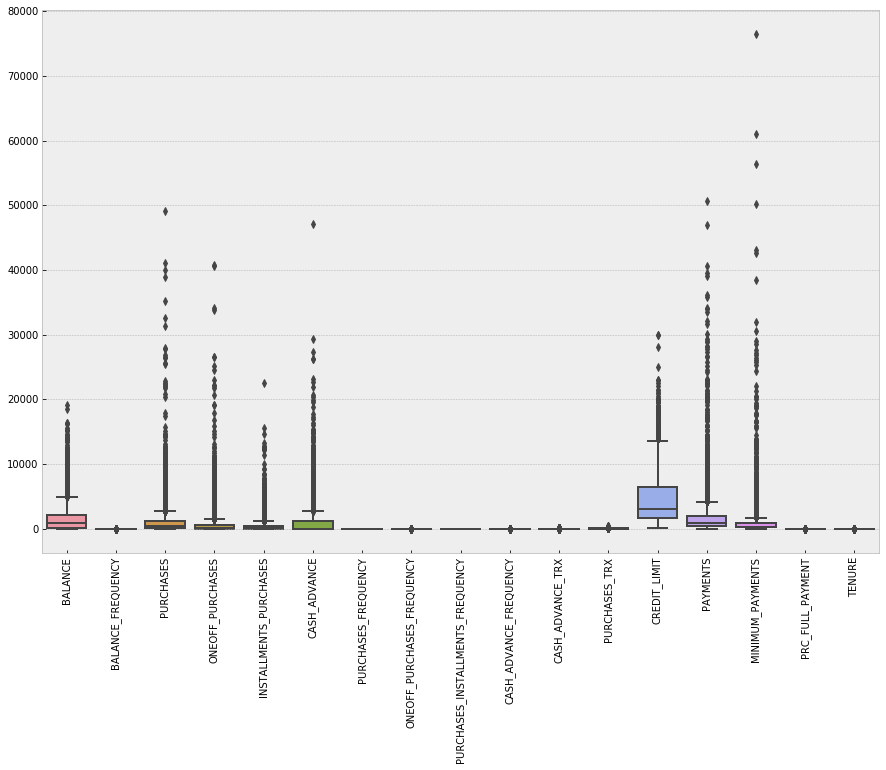

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

It has many outliers which will have to be removed.

## d. Drop unnecessary columns.

In [65]:
df = df.drop(columns = ['CUST_ID'],axis=1)

cus_id is unecessary column

In [66]:
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
df = df[(z < 3).all(axis=1)]
df.shape

(7434, 17)

Outliers are removed using z score

## e. Check correlation among features and comment your findings.

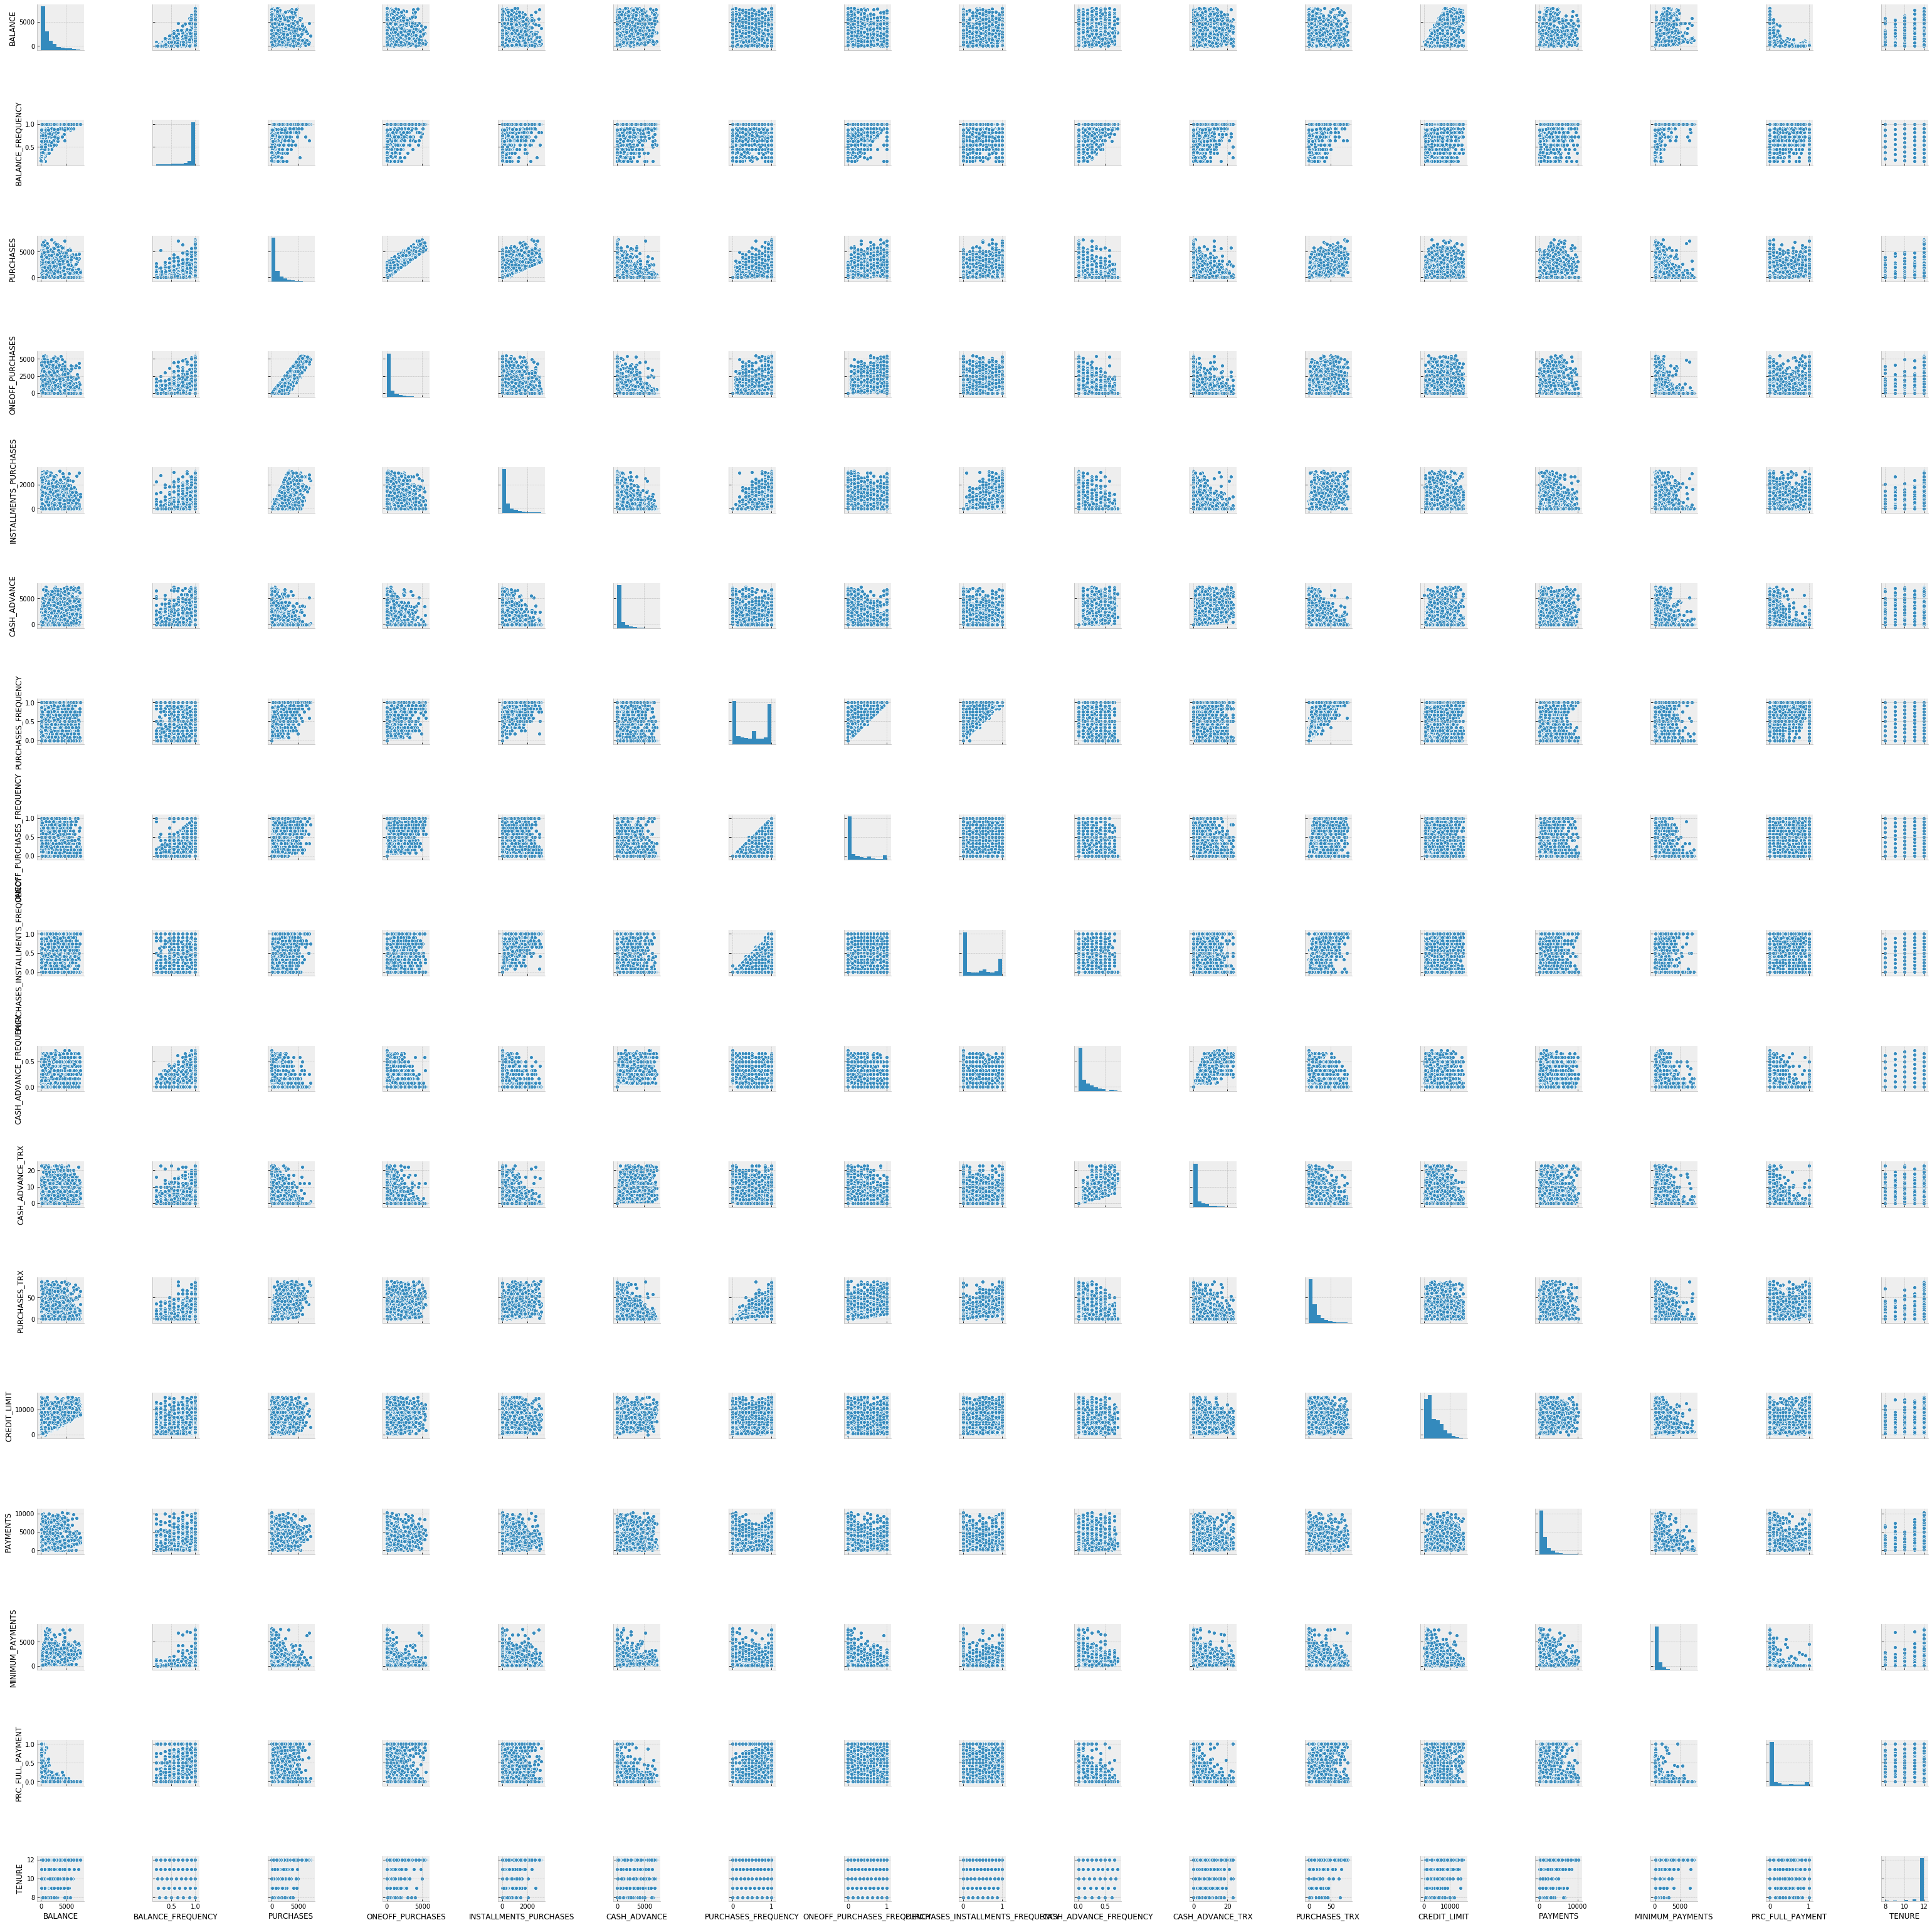

In [67]:
sns.pairplot(df)

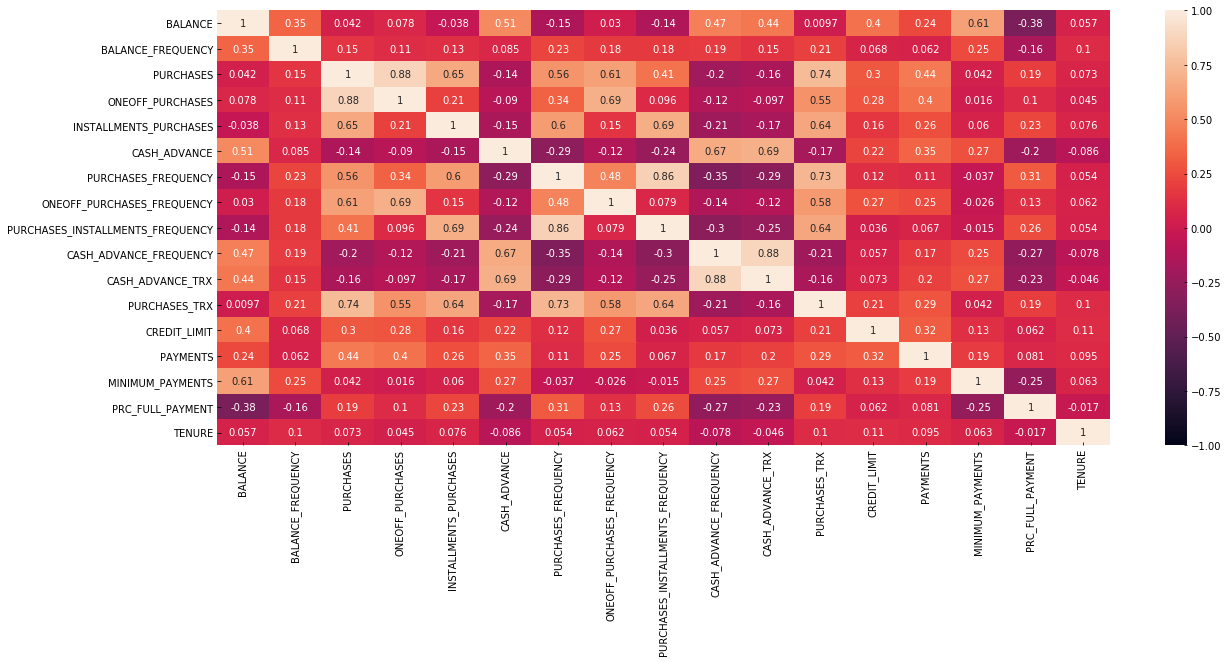

In [68]:
corr=df.corr() 
plt.figure(figsize=(20, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True)

PURCHASES has a high level of correlation with ONEOFF_PURCHASES and correspodnigly (CASH_ADVANCE_TRX & CASH_ADVANCE_FREQUENCY),
(PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY) and PURCHASES_TRX & INSTALLMENTS_PURCHASES & PURCHASES_FREQUENCY & PURCHASES) have high correlations. So dropping these columns


In [69]:
df.drop(['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'],axis=1,inplace=True)

'PURCHASES', 'PURCHASES_FREQUENCY' and 'CASH_ADVANCE_FREQUENCY' columns were dropped as they had a high degree of correlation with several other attributes.

## f. Check distribution of features and comment your findings.

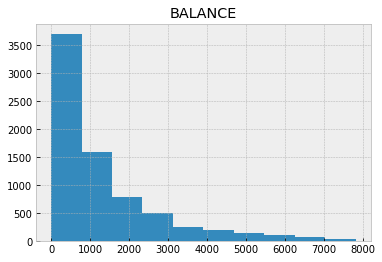

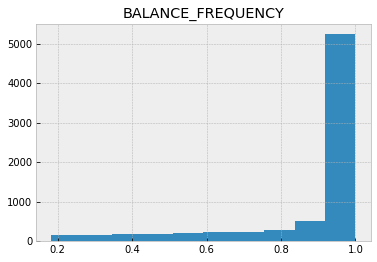

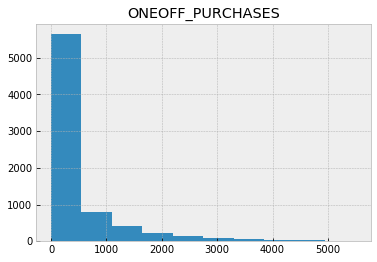

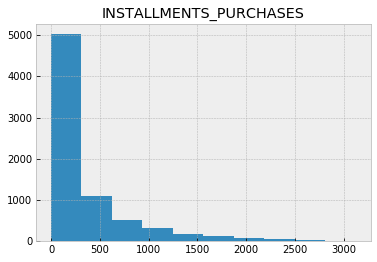

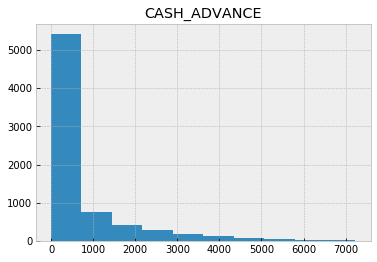

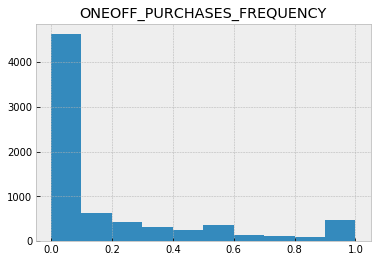

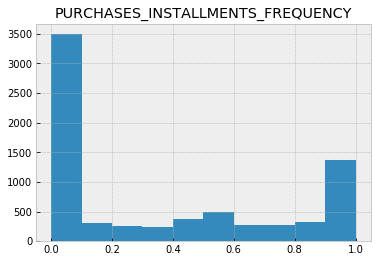

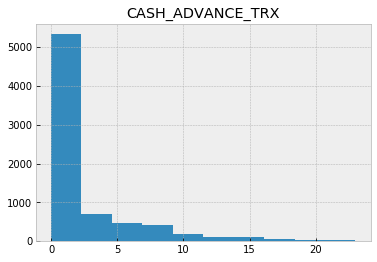

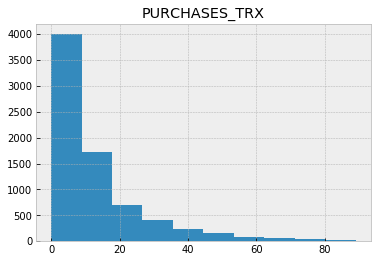

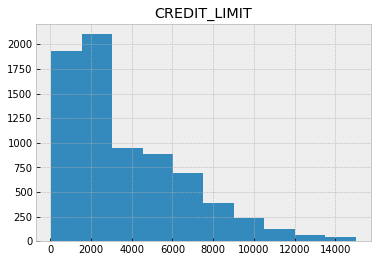

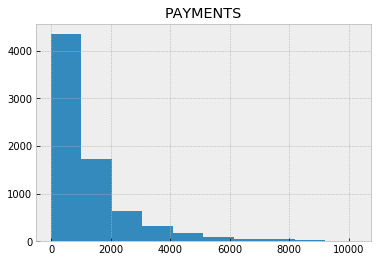

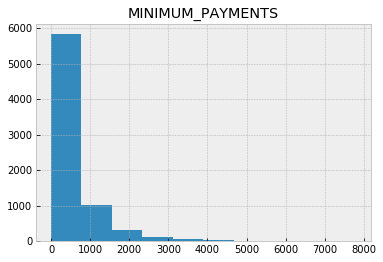

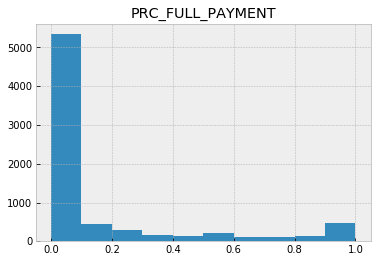

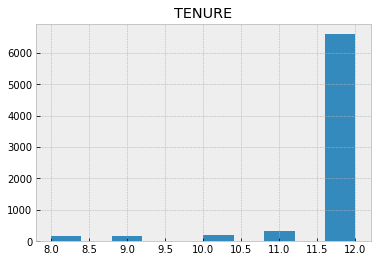

In [71]:
for col in df:
    df[[col]].hist()

#BALANCE_FREQUENCY: Mostly 1
#ONEOFF_PURCHASES: Mostly 0
#INSTALLMENTS_PURCHASES: 0-500
#CREDIT_LIMIT: Most populated for 2000
#TENURE: 12 is most popular.

## g. Standardize the data using appropriate methods

In [72]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the following.

## a. Build k means model on various k values and plot the inertia against various k values.

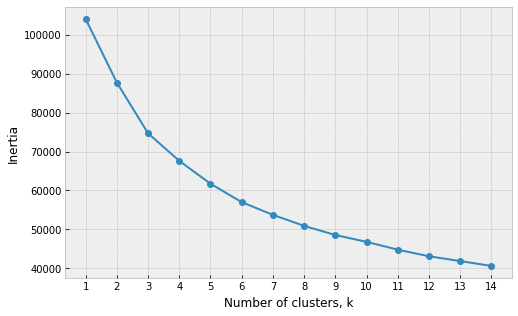

In [73]:
clusters = range(1, 15)
inertias = [] # initializing an empty array

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(clusters, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clusters)
plt.show()

From the above graph, we can see that, after the Number of clusters crosses 2, the decrease in steepness of inertia is not as much, hence we can take K = 2

## b. Evaluate the model using Silhouette coefficient

In [74]:
def k_means(n_clust, data_frame):
   
    model = KMeans(n_clusters = n_clust)
    model.fit(data_frame)
    y_clust = model.predict(data_frame)
    print(model.inertia_,silhouette_score(data_frame, y_clust, metric='euclidean'))

In [75]:
k_means(n_clust=2, data_frame=scaled_df)

87710.90297625441 0.23795911045129062


In [76]:
k_means(n_clust=3, data_frame=scaled_df)

74691.65696658145 0.22817715358428564


In [79]:
k_means(n_clust=4, data_frame=scaled_df)

67604.87382454096 0.17135422026117478


Silhouette coefficient is maximum for k=2

## c. Plot an elbow plot to find the optimal value of k

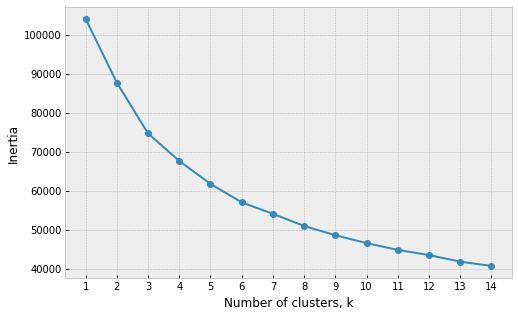

In [92]:
clusters = range(1, 15)
inertias = [] # initializing an empty array

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(clusters, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clusters)
plt.show()

optimal value of k is 2 from above graph

# d. Which k value gives the best result?

Optimal value of k is 2 as elbow method and Silhouette coefficient both shows that.

# 3. Apply PCA to the dataset and perform all steps from Q2 on the new features generated using PCA.

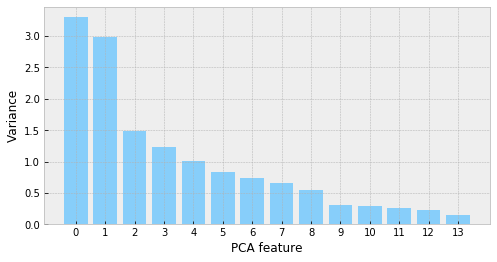

In [80]:
pca = PCA()
pca.fit(scaled_df)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

2 variable explain most of the dataset.So i will be taking no of features as 2

In [95]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

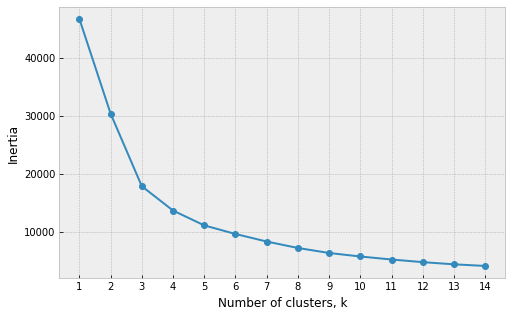

In [96]:
ks = range(1, 15)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [97]:
k_means(n_clust=2, data_frame=df_pca)

30364.537701996982 0.4069625967255683


For number of cluster=2 and number of features=2 we get maximum Silhouette coefficient.

# 4. Create a new column as a cluster label in the original data frame and perform cluster analysis. Check the correlation of cluster labels with various features and mention your inferences. (Hint - Does cluster 1 have a high credit limit?)

In [85]:
kmean= KMeans(2)
kmean.fit(scaled_df)
labels=kmean.labels_

In [86]:
df['labels']=labels

In [87]:
df

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.000000,3,7,500.0,98.225317,113.944625,0.000000,8,1
8877,55.147722,0.875000,0.00,163.31,0.000000,0.000000,0.750000,0,7,1000.0,62.619008,109.580539,0.000000,8,1
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,3,0,1200.0,150.755024,337.986933,0.000000,8,1
8879,137.744895,1.000000,0.00,441.00,0.000000,0.000000,0.625000,0,6,1000.0,169.249683,124.639905,0.000000,8,1


In [88]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
BALANCE,1.000000,0.349404,0.078321,-0.037524,0.509312,0.029860,-0.139821,0.435774,0.009701,0.400751,0.240485,0.613978,-0.377288,0.057468,-0.041861
BALANCE_FREQUENCY,0.349404,1.000000,0.113488,0.131446,0.085043,0.178007,0.177131,0.147070,0.210446,0.067577,0.061599,0.245498,-0.159424,0.104624,-0.212199
ONEOFF_PURCHASES,0.078321,0.113488,1.000000,0.206243,-0.089704,0.692882,0.095937,-0.097218,0.552959,0.284639,0.401436,0.016157,0.102127,0.045241,-0.564944
INSTALLMENTS_PURCHASES,-0.037524,0.131446,0.206243,1.000000,-0.150261,0.152086,0.686644,-0.168699,0.642291,0.157688,0.258346,0.059662,0.233630,0.076047,-0.603321
CASH_ADVANCE,0.509312,0.085043,-0.089704,-0.150261,1.000000,-0.123338,-0.238911,0.694980,-0.173397,0.221555,0.345054,0.268193,-0.203739,-0.086218,0.135045
ONEOFF_PURCHASES_FREQUENCY,0.029860,0.178007,0.692882,0.152086,-0.123338,1.000000,0.078747,-0.116999,0.582221,0.274026,0.247869,-0.025788,0.129034,0.061977,-0.597904
PURCHASES_INSTALLMENTS_FREQUENCY,-0.139821,0.177131,0.095937,0.686644,-0.238911,0.078747,1.000000,-0.245211,0.643047,0.035968,0.066594,-0.015086,0.256354,0.054076,-0.468543
CASH_ADVANCE_TRX,0.435774,0.147070,-0.097218,-0.168699,0.694980,-0.116999,-0.245211,1.000000,-0.163697,0.073034,0.203713,0.265936,-0.229574,-0.046225,0.154491
PURCHASES_TRX,0.009701,0.210446,0.552959,0.642291,-0.173397,0.582221,0.643047,-0.163697,1.000000,0.210458,0.285237,0.042241,0.193050,0.103801,-0.741364
CREDIT_LIMIT,0.400751,0.067577,0.284639,0.157688,0.221555,0.274026,0.035968,0.073034,0.210458,1.000000,0.318646,0.128209,0.062309,0.114121,-0.325095


Labels has maximum correlation with PURCHASES_TRX.Followed by NSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY and so on.

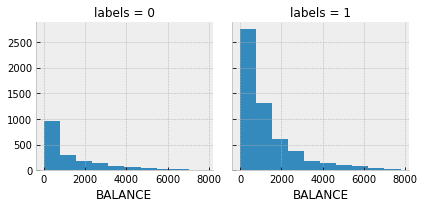

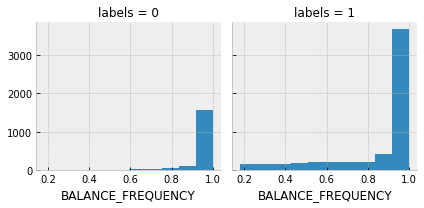

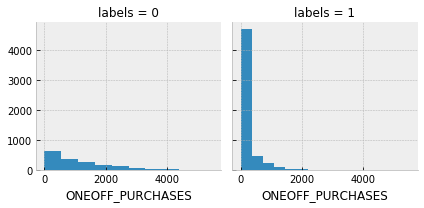

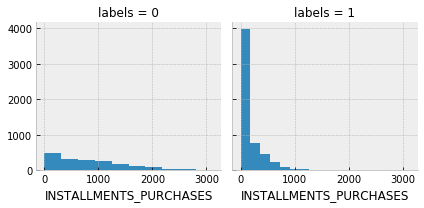

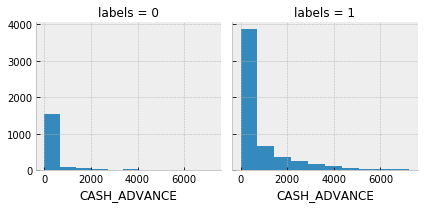

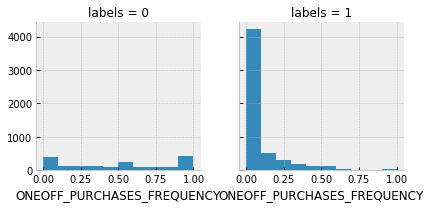

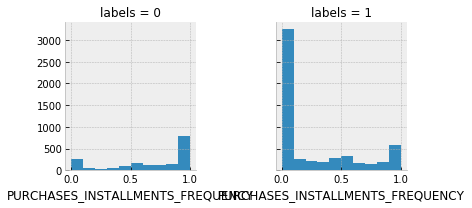

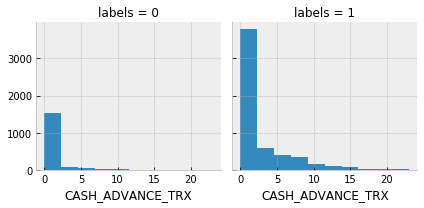

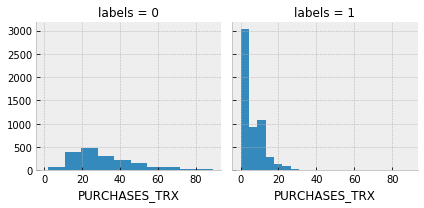

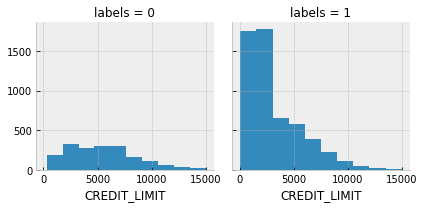

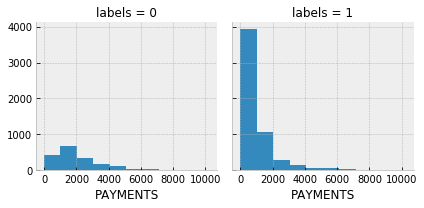

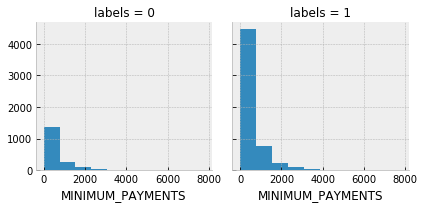

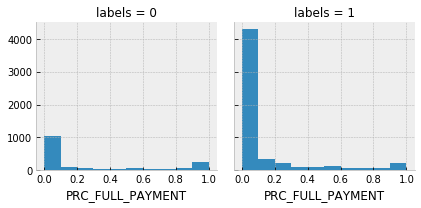

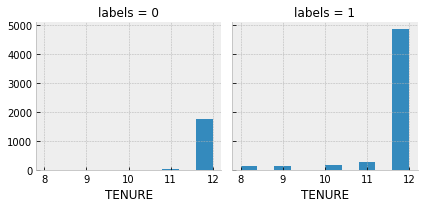

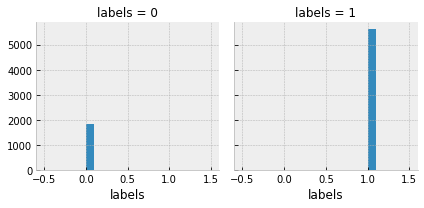

In [101]:
for i in df:
    grid= sns.FacetGrid(df, col='labels')
    grid.map(plt.hist, i)

Yes from above graph cluster 1 has higher credit limit.

# 5. Comment your findings and inferences and compare the performance. Does applying PCA give a better result in comparison to earlier?

Yes, applying PCA gave a better result in comparison to earlier.Silhouette coefficient increases from 0.23 to 0.40 whil using PCA.
The method is used removing ouliers and imputing median for missing values and applying kmeans for cluster size=2.